In [6]:
import matplotlib.pyplot as plt
import cv2

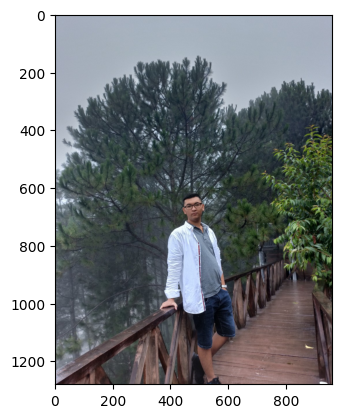

In [7]:
img = plt.imread('../pine.jpg')
plt.imshow(img)

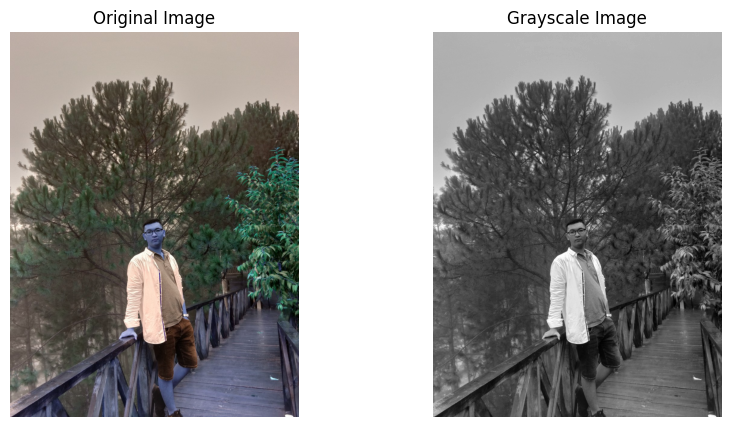

In [11]:
image_rgb = img.astype('float32') / 255.0

# Extract the R, G, B channels
R = image_rgb[:, :, 2]  # OpenCV loads in BGR, so R is at index 2
G = image_rgb[:, :, 1]  # Green channel
B = image_rgb[:, :, 0]  # Blue channel

# Apply the grayscale conversion formula
Y = 0.2126 * R + 0.7152 * G + 0.0722 * B

# Convert the result back to 8-bit image
Y = (Y * 255).astype('uint8')

# Save the resulting image as "mssv.jpg"
cv2.imwrite('mssv.jpg', Y)

# Display the original and grayscale image
plt.figure(figsize=(10, 5))

# Original RGB Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
plt.title('Original Image')
plt.axis('off')

# Grayscale Image
plt.subplot(1, 2, 2)
plt.imshow(Y, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

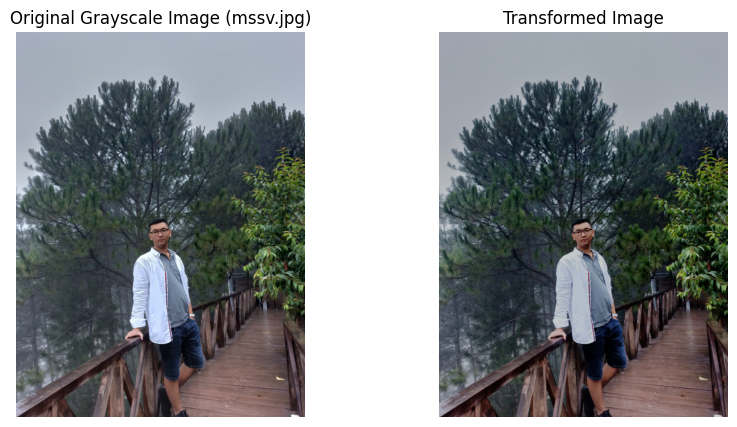

True

In [14]:
input_image = plt.imread('../pine.jpg')

# Set constants m and E (you can modify these values as needed)
m = 128  # Example value for m (you can experiment with different values)
E = 2    # Example value for E (you can experiment with different values)

# Apply the transformation formula
transformed_image = 1 / (1 + (m / (input_image + 1e-5))**E)

# Normalize the transformed image to the range [0, 255] and convert to uint8
transformed_image = (transformed_image * 255).astype('uint8')

# Display both the original and transformed images
plt.figure(figsize=(10, 5))

# Original Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Grayscale Image (mssv.jpg)')
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

# Optionally, save the transformed image
cv2.imwrite('transformed_mssv.jpg', transformed_image)

Text(0, 0.5, 'Frequency')

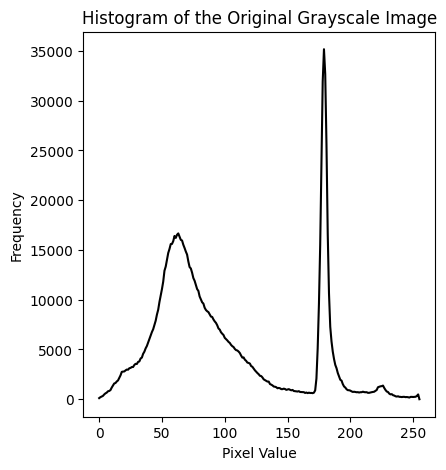

In [13]:
# vẽ histogram của ảnh trước và sau
# Calculate the histogram of the original and transformed images
hist_original = cv2.calcHist([Y], [0], None, [256], [0, 256])
hist_transformed = cv2.calcHist([transformed_image], [0], None, [256], [0, 256])

# Display the histograms
plt.figure(figsize=(10, 5))

# Histogram of the original grayscale image
plt.subplot(1, 2, 1)
plt.plot(hist_original, color='black')
plt.title('Histogram of the Original Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')



Applying Sobel filter


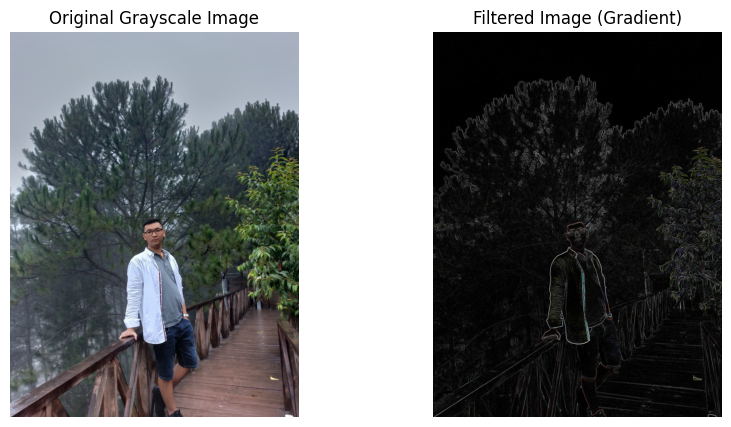

True

In [19]:
# Load the grayscale image (mssv.jpg) for gradient calculation
image = plt.imread('../pine.jpg')

# Example mssv: 20079801 (replace this with your actual mssv)
mssv = 22619011
filter_type = (mssv // 1000) % 4  # Get the fourth digit of mssv and calculate modulus 4

# Apply the selected filter based on the modulus result
if filter_type == 0:
    print("Applying Robert Cross (not available in OpenCV, skipping)")
    gradient_image = image  # For demonstration, keep original (since OpenCV doesn't have Roberts filter)
elif filter_type == 1:
    print("Applying Sobel filter")
    # Sobel filter
    gradient_image_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_image_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient_image = cv2.magnitude(gradient_image_x, gradient_image_y)
elif filter_type == 2:
    print("Applying Prewitt filter")
    # Prewitt filter (approximated with kernel)
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    gradient_image_x = cv2.filter2D(image, -1, kernelx)
    gradient_image_y = cv2.filter2D(image, -1, kernely)
    gradient_image = cv2.magnitude(gradient_image_x, gradient_image_y)
elif filter_type == 3:
    print("Applying Laplacian filter")
    # Laplacian filter
    gradient_image = cv2.Laplacian(image, cv2.CV_64F)

# Normalize the gradient image for better visualization
gradient_image = cv2.normalize(gradient_image, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Display original and filtered images
plt.figure(figsize=(10, 5))

# Original Grayscale Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Gradient Image
plt.subplot(1, 2, 2)
plt.imshow(gradient_image, cmap='gray')
plt.title('Filtered Image (Gradient)')
plt.axis('off')

plt.show()

# Optionally, save the gradient image
cv2.imwrite('gradient_mssv.jpg', gradient_image)


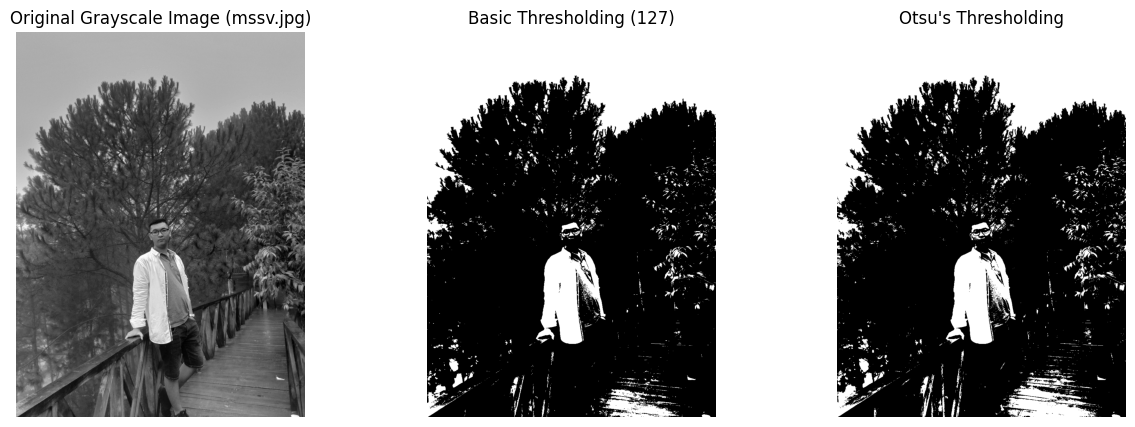

True

In [22]:
import cv2
import matplotlib.pyplot as plt

# Load the grayscale image (mssv.jpg)
image = cv2.imread('../pine.jpg', cv2.IMREAD_GRAYSCALE)

# 1. Basic global thresholding (you can set a threshold value, e.g., 127)
_, basic_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 2. Otsu's thresholding
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display original and thresholded images
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image (mssv.jpg)')
plt.axis('off')

# Basic Thresholding
plt.subplot(1, 3, 2)
plt.imshow(basic_thresh, cmap='gray')
plt.title('Basic Thresholding (127)')
plt.axis('off')

# Otsu Thresholding
plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.show()

# Optionally, save the thresholded images
cv2.imwrite('basic_thresh_mssv.jpg', basic_thresh)
cv2.imwrite('otsu_thresh_mssv.jpg', otsu_thresh)
